In [1]:
# Concept from LangChain: https://python.langchain.com/en/latest/use_cases/agent_simulations/two_player_dnd.html
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
from srv.chatlibs.dialogue_agent import DialogueAgent

In [3]:
from srv.chatlibs.dialogue_sim import DialogueSimulator

In [4]:
from srv.chatlibs.image_generator2 import ImageGenerator

In [5]:
from dotenv import load_dotenv, find_dotenv

In [6]:
load_dotenv(find_dotenv())

True

In [7]:
from langchain.schema import (
    HumanMessage,
    SystemMessage,
)

In [8]:
from langchain.chat_models import ChatOpenAI

In [9]:
from IPython import display

===== Init Lang Vars =====

In [10]:
# system message for story teller (dungeon master)
# (using HumanMessage)
protagonist_name = "Ninja 1"
playerslist = [protagonist_name]
storyteller_name = "Dungeon Master"
quest = """Defeat the Legendary 13 Tail Monster to free the village of the fate of obliteration.
 This is a Naruto themed quest set in a Naruto-themed village in a large world consisting of many ninja villages spanning across 9 continents.
 """
word_limit = 50

game_description = f"""Here is the topic for a Dungeons & Dragons game: {quest}.
        There is currently {len(playerslist)} players in this game. One of them goes by the name: {playerslist[0]}.
        However, more players can enter during the conversation.
        The story is narrated by the storyteller, {storyteller_name}."""

game_description

'Here is the topic for a Dungeons & Dragons game: Defeat the Legendary 13 Tail Monster to free the village of the fate of obliteration.\n This is a Naruto themed quest set in a Naruto-themed village in a large world consisting of many ninja villages spanning across 9 continents.\n .\n        There is currently 1 players in this game. One of them goes by the name: Ninja 1.\n        However, more players can enter during the conversation.\n        The story is narrated by the storyteller, Dungeon Master.'

In [11]:
player_descriptor_system_message = SystemMessage(
    content="You can add detail to the description of a Dungeons & Dragons player.")
player_descriptor_system_message

SystemMessage(content='You can add detail to the description of a Dungeons & Dragons player.', additional_kwargs={})

===== 1. Init Quest Specific Description, Gen Quest Image =====

In [ ]:
# 1a. Generate Specific Quest

In [12]:
questspecifics = ChatOpenAI(temperature=1.0)(

    [
        SystemMessage(content="You can make a task more specific."),
        HumanMessage(content=
            f"""{game_description}
            
            You are the storyteller, {storyteller_name}.
            Please make the quest more specific. Be creative and imaginative.
            Please reply with the specified quest in {word_limit} words or less. 
            Speak directly to the {storyteller_name}, but describe in general what the players must do to complete the quest.
            Do not add anything else."""
            )
    ]

)

questspecifics.content

'Dungeon Master, to defeat the Legendary 13 Tail Monster, Ninja 1 must retrieve the forbidden scrolls hidden deep within the ruins guarded by the Three-Headed Serpent. Once obtained, Ninja 1 must summon the legendary toad, Gamabunta, to aid in the battle against the monster.'

In [13]:
generator = ImageGenerator(
        os.environ.get("IMAGE_GENERATION_API_URL"),
        ChatOpenAI(temperature=0.8)
                          )

In [14]:
# 1b. Get Image Prompt for Quest Specifc
imageprompt = generator.generate_image_prompt(protagonist_name, questspecifics.content)
# prompt appends theme specific tokens
imageprompt

'A painting of the Ninja 1 from the Universe of Naruto, with the forbidden scrolls, action of retrieving, clean backdrop of the ruins guarded by the Three-Headed Serpent.'

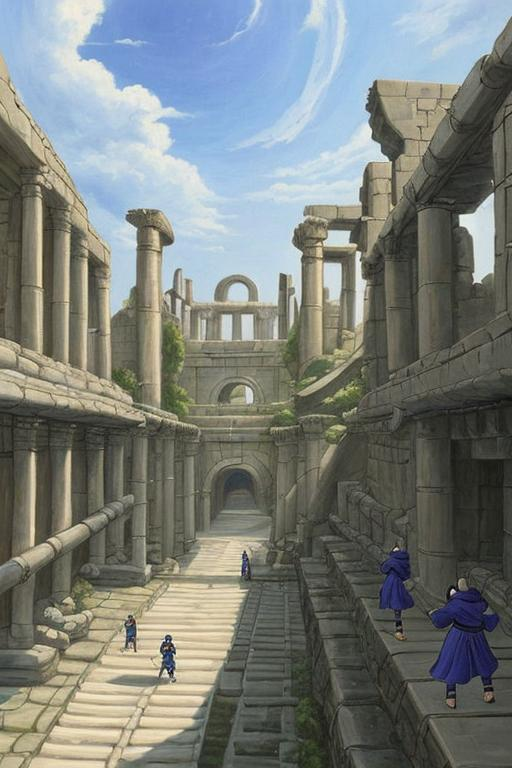

In [15]:
# 1c. Generate image for Quest Specific
questImage64 = generator.generate_image(imageprompt)
display.Image(questImage64)

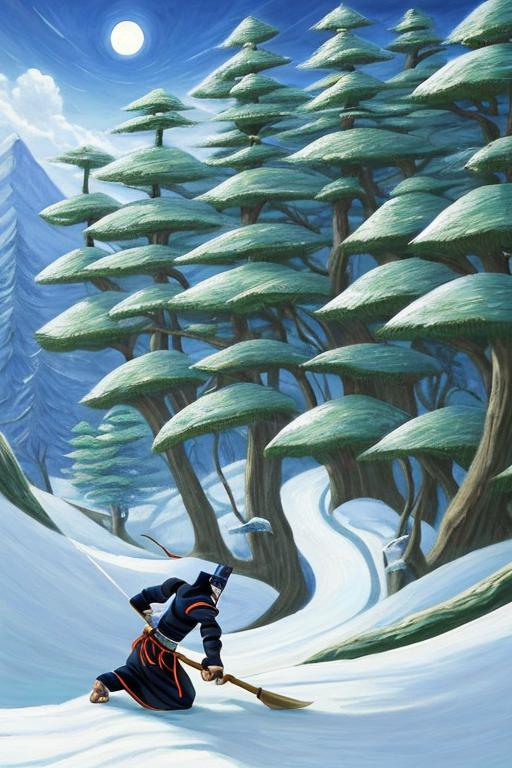

In [48]:
# 1c. Generate image for Quest Specific
#questImage64 = generator.generate_image(imageprompt)
questImage64 = generator.generate_image(
"A painting of Ninja 1 from the Universe of Naruto, with a rare map of the Legendary 13 Tail Monster\'s weak points, action of convincing the other ninja clan to help, and clean backdrop of a dark forest.")
display.Image(questImage64)

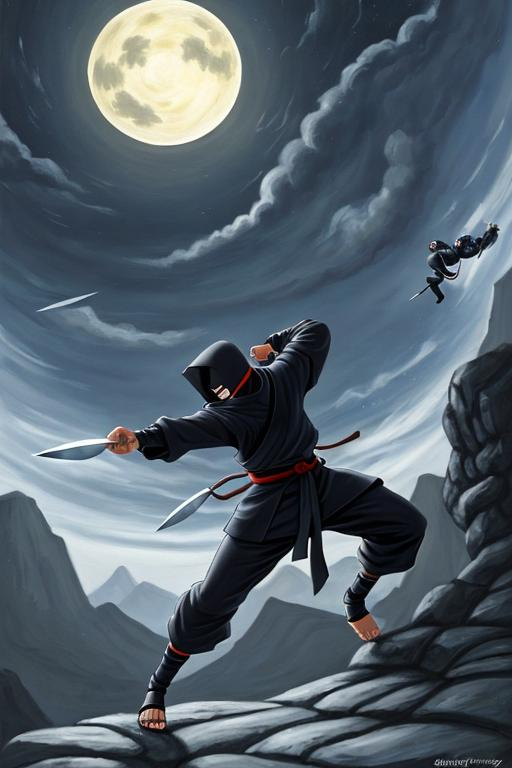

In [24]:
# 1c. Generate image for Quest Specific
#questImage64 = generator.generate_image(imageprompt)
questImage64 = generator.generate_image(
"A painting of the Ninja 1 from the Universe of Naruto, with a silver kunai knife, action of stealthily evading traps, clean backdrop of a dark and eerie dungeon."
)
display.Image(questImage64)

===== 2. Create Characters =====

In [16]:
player_descriptor_system_message

SystemMessage(content='You can add detail to the description of a Dungeons & Dragons player.', additional_kwargs={})

In [17]:
game_description

'Here is the topic for a Dungeons & Dragons game: Defeat the Legendary 13 Tail Monster to free the village of the fate of obliteration.\n This is a Naruto themed quest set in a Naruto-themed village in a large world consisting of many ninja villages spanning across 9 continents.\n .\n        There is currently 1 players in this game. One of them goes by the name: Ninja 1.\n        However, more players can enter during the conversation.\n        The story is narrated by the storyteller, Dungeon Master.'

In [18]:
# 2a create Dungeon Master
prompts = []
prompts.append(player_descriptor_system_message)
prompts.append(
    HumanMessage(content=f"""{game_description}
Please reply with a creative description of the storyteller, {storyteller_name}, in {word_limit} words or less. 
Speak directly to {storyteller_name}.
Do not add anything else.
""")
)

dm_system_message = ChatOpenAI(temperature=1.0)(prompts).content
print(dm_system_message)

dm_agent = DialogueAgent(
    name=storyteller_name,
    system_message=dm_system_message,
    model=ChatOpenAI(temperature=0.2)
)

print()
print()
print(dm_agent.model)

Dungeon Master, your voice echoes with the authority of a master storyteller. Your eyes dart across the table, taking in every move and gesture. You are both benevolent guide and cunning adversary, weaving a tale that will challenge and thrill us. We are at your mercy, and entranced by your every word.


verbose=False callbacks=None callback_manager=None client=<class 'openai.api_resources.chat_completion.ChatCompletion'> model_name='gpt-3.5-turbo' temperature=0.2 model_kwargs={} openai_api_key=None openai_api_base=None openai_organization=None request_timeout=None max_retries=6 streaming=False n=1 max_tokens=None


In [19]:
# 2b. create Protoganist

prompts = []
prompts.append(player_descriptor_system_message)
prompts.append(
    HumanMessage(content=
            f"""
{game_description}
Please reply with a creative description of the protagonist, {protagonist_name}, in {word_limit} words or less. 
Speak directly to {protagonist_name}.
Do not add anything else.            
""")
)

protoganist_system_message = ChatOpenAI(temperature=1.0)(prompts).content
print(protoganist_system_message)


protoganist_agent = DialogueAgent(
    name=storyteller_name,
    system_message=protoganist_system_message,
    model=ChatOpenAI(temperature=0.2)
)


print()
print()
print(protoganist_agent.model)

Ninja 1, you are a fierce warrior with exceptional talents in shuriken throwing and hand-to-hand combat. Your unwavering determination to protect the village and its people has earned you the respect of your fellow ninjas. Your unwavering focus and tenacity will be crucial in defeating the Legendary 13 Tail Monster and saving the village.


verbose=False callbacks=None callback_manager=None client=<class 'openai.api_resources.chat_completion.ChatCompletion'> model_name='gpt-3.5-turbo' temperature=0.2 model_kwargs={} openai_api_key=None openai_api_base=None openai_organization=None request_timeout=None max_retries=6 streaming=False n=1 max_tokens=None


In [20]:
# 2c. init Dialogue Sim
# Dialogue Sim Object here just provides a function to inject replied story message to Agents in Character List
character_list = [dm_agent, protoganist_agent]
simulator = DialogueSimulator(character_list)

===== 3. Start Convos =====

In [21]:
# 3a. Inject Specific Quest To Start
simulator.reset()
simulator.inject(storyteller_name, questspecifics.content)
questspecifics.content

'Dungeon Master, to defeat the Legendary 13 Tail Monster, Ninja 1 must retrieve the forbidden scrolls hidden deep within the ruins guarded by the Three-Headed Serpent. Once obtained, Ninja 1 must summon the legendary toad, Gamabunta, to aid in the battle against the monster.'

In [22]:
simulator.agents[0].message_history

['Here is the conversation so far.',
 'Dungeon Master: Dungeon Master, to defeat the Legendary 13 Tail Monster, Ninja 1 must retrieve the forbidden scrolls hidden deep within the ruins guarded by the Three-Headed Serpent. Once obtained, Ninja 1 must summon the legendary toad, Gamabunta, to aid in the battle against the monster.']

In [23]:
# Convo here is altered to start with User/Protoganist so that
# DM can reply its reaction
# 1st Inject Dialogue Sim with User message 
# Then 2nd Inject Dialogue Sim with 
simulator.inject(protagonist_name, "I am ready. First what items are in my travel bag?")
responded_narrative = dm_agent.send() # send will feed entire message history so far so that AI completes the rest

simulator.inject(storyteller_name, responded_narrative)

responded_narrative

'In your travel bag, you have a set of throwing knives, a grappling hook, a smoke bomb, a healing potion, and a map of the ruins.'

In [24]:
# Convo here is altered to start with User/Protoganist so that
# DM can reply its reaction
# 1st Inject Dialogue Sim with User message 
# Then 2nd Inject Dialogue Sim with 
simulator.inject(protagonist_name, "And what skill or Jitsu do I know?")
responded_narrative = dm_agent.send() # send will feed entire message history so far so that AI completes the rest

simulator.inject(storyteller_name, responded_narrative)

responded_narrative

'You are skilled in the art of stealth and assassination, as well as the Shadow Clone Jutsu and the Rasengan technique. You also have some knowledge of elemental ninjutsu, specifically the Fire Style: Fireball Jutsu.'

In [25]:
# Convo here is altered to start with User/Protoganist so that
# DM can reply its reaction
# 1st Inject Dialogue Sim with User message 
# Then 2nd Inject Dialogue Sim with 
simulator.inject(protagonist_name, "What rank of ninja am I?")
responded_narrative = dm_agent.send() # send will feed entire message history so far so that AI completes the rest

simulator.inject(storyteller_name, responded_narrative)

responded_narrative

'You are a highly skilled and experienced Jōnin, Ninja 1. Your training and expertise have prepared you for this mission.'

In [26]:
# Convo here is altered to start with User/Protoganist so that
# DM can reply its reaction
# 1st Inject Dialogue Sim with User message 
# Then 2nd Inject Dialogue Sim with 
simulator.inject(protagonist_name, "Alright. I hurry off into the forest insearch for the 13 Tail. But who do I see first?")
responded_narrative = dm_agent.send() # send will feed entire message history so far so that AI completes the rest

simulator.inject(storyteller_name, responded_narrative)

responded_narrative

'As you make your way through the forest, you come across a group of bandits who are blocking your path. They seem to be heavily armed and are eyeing you suspiciously. What do you do, Ninja 1?'

===== 4. Print Diagnostics =====

In [27]:
# history for DM so far
simulator.agents[0].message_history

['Here is the conversation so far.',
 'Dungeon Master: Dungeon Master, to defeat the Legendary 13 Tail Monster, Ninja 1 must retrieve the forbidden scrolls hidden deep within the ruins guarded by the Three-Headed Serpent. Once obtained, Ninja 1 must summon the legendary toad, Gamabunta, to aid in the battle against the monster.',
 'Ninja 1: I am ready. First what items are in my travel bag?',
 'Dungeon Master: In your travel bag, you have a set of throwing knives, a grappling hook, a smoke bomb, a healing potion, and a map of the ruins.',
 'Ninja 1: And what skill or Jitsu do I know?',
 'Dungeon Master: You are skilled in the art of stealth and assassination, as well as the Shadow Clone Jutsu and the Rasengan technique. You also have some knowledge of elemental ninjutsu, specifically the Fire Style: Fireball Jutsu.',
 'Ninja 1: What rank of ninja am I?',
 'Dungeon Master: You are a highly skilled and experienced Jōnin, Ninja 1. Your training and expertise have prepared you for this mis

In [28]:
# history for Player 1 so far
simulator.agents[1].message_history

['Here is the conversation so far.',
 'Dungeon Master: Dungeon Master, to defeat the Legendary 13 Tail Monster, Ninja 1 must retrieve the forbidden scrolls hidden deep within the ruins guarded by the Three-Headed Serpent. Once obtained, Ninja 1 must summon the legendary toad, Gamabunta, to aid in the battle against the monster.',
 'Ninja 1: I am ready. First what items are in my travel bag?',
 'Dungeon Master: In your travel bag, you have a set of throwing knives, a grappling hook, a smoke bomb, a healing potion, and a map of the ruins.',
 'Ninja 1: And what skill or Jitsu do I know?',
 'Dungeon Master: You are skilled in the art of stealth and assassination, as well as the Shadow Clone Jutsu and the Rasengan technique. You also have some knowledge of elemental ninjutsu, specifically the Fire Style: Fireball Jutsu.',
 'Ninja 1: What rank of ninja am I?',
 'Dungeon Master: You are a highly skilled and experienced Jōnin, Ninja 1. Your training and expertise have prepared you for this mis

In [29]:
simulator.agents[1].system_message

'Ninja 1, you are a fierce warrior with exceptional talents in shuriken throwing and hand-to-hand combat. Your unwavering determination to protect the village and its people has earned you the respect of your fellow ninjas. Your unwavering focus and tenacity will be crucial in defeating the Legendary 13 Tail Monster and saving the village.'

===== 5. Create Player 2 =====

In [30]:
player_descriptor_system_message

SystemMessage(content='You can add detail to the description of a Dungeons & Dragons player.', additional_kwargs={})

In [31]:
game_description

'Here is the topic for a Dungeons & Dragons game: Defeat the Legendary 13 Tail Monster to free the village of the fate of obliteration.\n This is a Naruto themed quest set in a Naruto-themed village in a large world consisting of many ninja villages spanning across 9 continents.\n .\n        There is currently 1 players in this game. One of them goes by the name: Ninja 1.\n        However, more players can enter during the conversation.\n        The story is narrated by the storyteller, Dungeon Master.'

In [32]:
# 5a. create Player 2
player2_name = "Ninja 2"
prompts = []
prompts.append(player_descriptor_system_message)
prompts.append(
    HumanMessage(content=
            f"""
{game_description}
Please reply with a creative description of the new player, {player2_name}, in {word_limit} words or less. 
Speak directly to {player2_name}.
Do not add anything else.            
""")
)

player2_system_message = ChatOpenAI(temperature=1.0)(prompts).content
print(player2_system_message)


player2_agent = DialogueAgent(
    name=storyteller_name,
    system_message=player2_system_message,
    model=ChatOpenAI(temperature=0.2)
)


print()
print()
print(player2_agent.model)

Welcome, Ninja 2. Your reputation as a master of fuinjutsu (sealing techniques) precedes you. You approach the village gates, carrying a mysterious scroll on your back. The villagers look at you with cautious hope, aware that only someone as skilled as you can help them defeat the 13-tailed monster.


verbose=False callbacks=None callback_manager=None client=<class 'openai.api_resources.chat_completion.ChatCompletion'> model_name='gpt-3.5-turbo' temperature=0.2 model_kwargs={} openai_api_key=None openai_api_base=None openai_organization=None request_timeout=None max_retries=6 streaming=False n=1 max_tokens=None


In [33]:
# 5b. update Player2 of events so far
player2_agent.message_history = simulator.agents[0].message_history # update with DM's history

In [34]:
# 5c. add player 2 to simulator
simulator.agents.append(player2_agent)

In [35]:
simulator.agents[2].system_message

'Welcome, Ninja 2. Your reputation as a master of fuinjutsu (sealing techniques) precedes you. You approach the village gates, carrying a mysterious scroll on your back. The villagers look at you with cautious hope, aware that only someone as skilled as you can help them defeat the 13-tailed monster.'

In [36]:
# 5d. welcome player 2
#simulator.inject(storyteller_name, responded_narrative)

dm_agent.model([
                    SystemMessage(content=dm_agent.system_message),
                    HumanMessage(content="\n".join(dm_agent.message_history + [
                        f"""{player2_name} has just entered the game. 
                        Please describe the new player's current spawn location in realtion to the series of events."""]))
                 ]).content

"Dungeon Master: Ninja 2, you have just spawned in a nearby village, about a day's journey away from Ninja 1's current location. You have been sent on a mission by your village leader to gather information about a potential threat to your village. As you make your way through the village, you hear rumors of a powerful monster with 13 tails that has been terrorizing the nearby forest. This catches your attention, as it may be related to your mission. What do you do, Ninja 2?"

In [37]:
# 5d. get player2's spawn locaton and inject Storyteller Narration
player2_spawn_loc = dm_agent.model([
                    SystemMessage(content=dm_agent.system_message),
                    HumanMessage(content="\n".join(dm_agent.message_history + [
                        f"""{player2_name} has just entered the game. 
                        Please describe the new player's current spawn location in realtion to the series of events."""]))
                 ]).content
player2_spawn_loc

"Dungeon Master: Ninja 2, you have just spawned in a nearby village, about a day's journey away from Ninja 1's current location. You have been sent on a mission to deliver a message to the leader of the village, but you have some free time before you need to complete your task. What do you do?"

In [38]:
player2_spawn_loc.replace("Dungeon Master: ", "")

"Ninja 2, you have just spawned in a nearby village, about a day's journey away from Ninja 1's current location. You have been sent on a mission to deliver a message to the leader of the village, but you have some free time before you need to complete your task. What do you do?"

In [39]:
# 5e. inject storyteller narration
simulator.inject(storyteller_name, player2_spawn_loc.replace("Dungeon Master: ", ""))

In [52]:
# history so far
simulator.agents[0].message_history

['Here is the conversation so far.',
 'Dungeon Master: Dungeon Master, to defeat the Legendary 13 Tail Monster, Ninja 1 must retrieve the forbidden scrolls hidden deep within the ruins guarded by the Three-Headed Serpent. Once obtained, Ninja 1 must summon the legendary toad, Gamabunta, to aid in the battle against the monster.',
 'Ninja 1: I am ready. First what items are in my travel bag?',
 'Dungeon Master: In your travel bag, you have a set of throwing knives, a grappling hook, a smoke bomb, a healing potion, and a map of the ruins.',
 'Ninja 1: And what skill or Jitsu do I know?',
 'Dungeon Master: You are skilled in the art of stealth and assassination, as well as the Shadow Clone Jutsu and the Rasengan technique. You also have some knowledge of elemental ninjutsu, specifically the Fire Style: Fireball Jutsu.',
 'Ninja 1: What rank of ninja am I?',
 'Dungeon Master: You are a highly skilled and experienced Jōnin, Ninja 1. Your training and expertise have prepared you for this mis

In [67]:
# 5f. Player 2 response
simulator.inject(player2_name, """I wanted to head to the bookshop to buy the latest series of Icha Icha series. 
The book that Kakashi likes to read.""")
responded_narrative = dm_agent.send() # send will feed entire message history so far so that AI completes the rest

simulator.inject(storyteller_name, responded_narrative)

responded_narrative

'As you make your way to the bookshop, you notice a commotion in the nearby marketplace. A group of bandits are causing trouble and harassing the villagers. What do you do, Ninja 2?'

In [68]:
# history so far
simulator.agents[0].message_history

['Here is the conversation so far.',
 'Dungeon Master: Dungeon Master, to defeat the Legendary 13 Tail Monster, Ninja 1 must retrieve the forbidden scrolls hidden deep within the ruins guarded by the Three-Headed Serpent. Once obtained, Ninja 1 must summon the legendary toad, Gamabunta, to aid in the battle against the monster.',
 'Ninja 1: I am ready. First what items are in my travel bag?',
 'Dungeon Master: In your travel bag, you have a set of throwing knives, a grappling hook, a smoke bomb, a healing potion, and a map of the ruins.',
 'Ninja 1: And what skill or Jitsu do I know?',
 'Dungeon Master: You are skilled in the art of stealth and assassination, as well as the Shadow Clone Jutsu and the Rasengan technique. You also have some knowledge of elemental ninjutsu, specifically the Fire Style: Fireball Jutsu.',
 'Ninja 1: What rank of ninja am I?',
 'Dungeon Master: You are a highly skilled and experienced Jōnin, Ninja 1. Your training and expertise have prepared you for this mis